In [29]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.family'] = 'sans-serif'

In [30]:
# # Скачиваем данные и корректируем их
# def download_weather_month(year, month):
#     print(month)
#     url = url_template.format(year=year, month=month)
#     weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True)
#     weather_data = weather_data.dropna(axis=1)
#     weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
#     weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time'], axis=1)
#     return weather_data

In [31]:
# url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
# data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]
# weather_2012 = pd.concat(data_by_month)
# weather_2012.to_csv('data/weather_2012.csv')

In [32]:
# Скачиваем данные с сайта
dir = os.path.abspath(os.curdir).replace('pandas_graphs', 'data/').replace("\\", '/')
weather_mar2012 = pd.read_csv(dir + 'weather_2012_march.csv', index_col='Date/Time', parse_dates=True, encoding='latin')
weather_mar2012

,Year,Month,Day,Time,Temp (C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,0:00,-5.5,NaN,-9.7,NaN,72,NaN,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,1:00,-5.7,NaN,-8.7,NaN,79,NaN,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,2:00,-5.4,NaN,-8.3,NaN,80,NaN,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-03-31 21:00:00,2012,3,31,21:00,2.6,NaN,-6.3,NaN,52,NaN,...,NaN,25.0,NaN,100.86,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 22:00:00,2012,3,31,22:00,2.7,NaN,-6.7,NaN,50,NaN,...,NaN,25.0,NaN,100.82,NaN,NaN,NaN,NaN,NaN,Clear
2012-03-31 23:00:00,2012,3,31,23:00,1.5,NaN,-6.9,NaN,54,NaN,...,NaN,25.0,NaN,100.79,NaN,NaN,NaN,NaN,NaN,Clear


In [33]:
weather_mar2012.columns

Index(['Year', 'Month', 'Day', 'Time', 'Temp (C)', 'Temp Flag',
       'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)',
       'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

Index(['Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)', 'Wind Spd (km/h)',
       'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

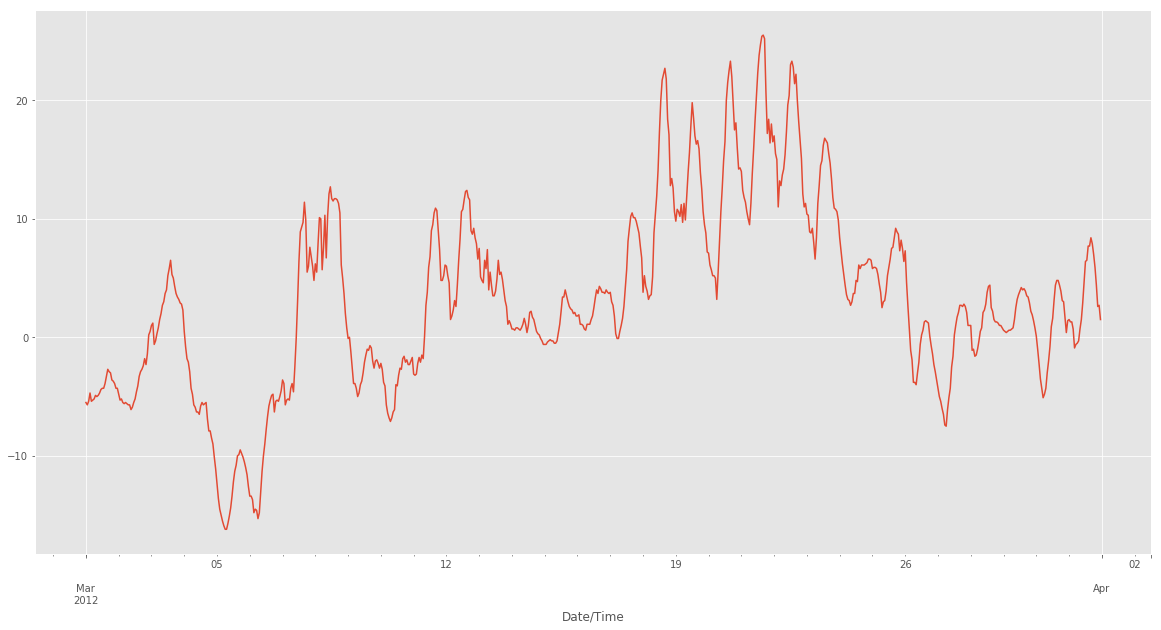

In [34]:
# Форматируем колонки
weather_mar2012["Temp (C)"].plot()

# Удаляем любую колонку, где есть пустые данные
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')  
weather_mar2012.columns = [u'Year', u'Month', u'Day', u'Time', u'Temp (C)', u'Dew Point Temp (C)', u'Rel Hum (%)',
                           u'Wind Spd (km/h)', u'Visibility (km)', u'Stn Press (kPa)', u'Weather']
weather_mar2012 = weather_mar2012.drop(['Year', 'Month', 'Day', 'Time'], axis=1)
weather_mar2012.columns

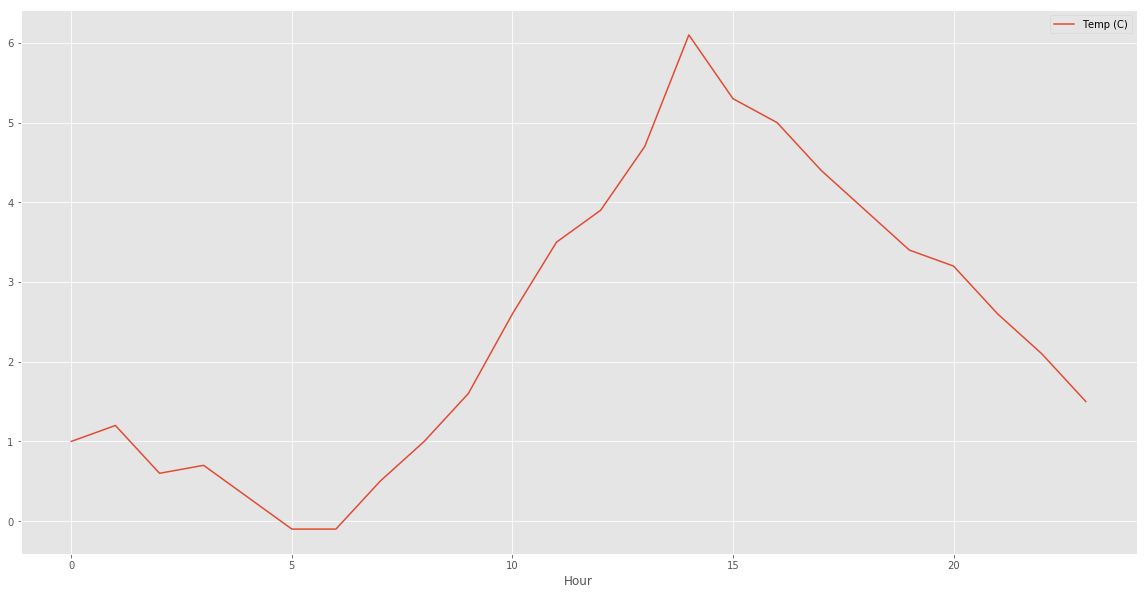

In [35]:
# В каком часу наивысшая температура за месяц в среднем
temperatures = weather_mar2012[[u'Temp (C)']].copy()
temperatures.loc[:, 'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()